<a href="https://www.kaggle.com/code/jimschacko/credit-card-fraud-using-lr-with-hyper-tuning?scriptVersionId=118311064" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv("D:\AI & DS\L5 Year 2\CM2603 Data Science Group Project\Datasets\Dataset - 2023\creditcard_2023.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
dataset.shape

(568630, 31)

In [7]:
#Checking for null values through function and heatmap
dataset.isnull().any()

id        False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

<Axes: >

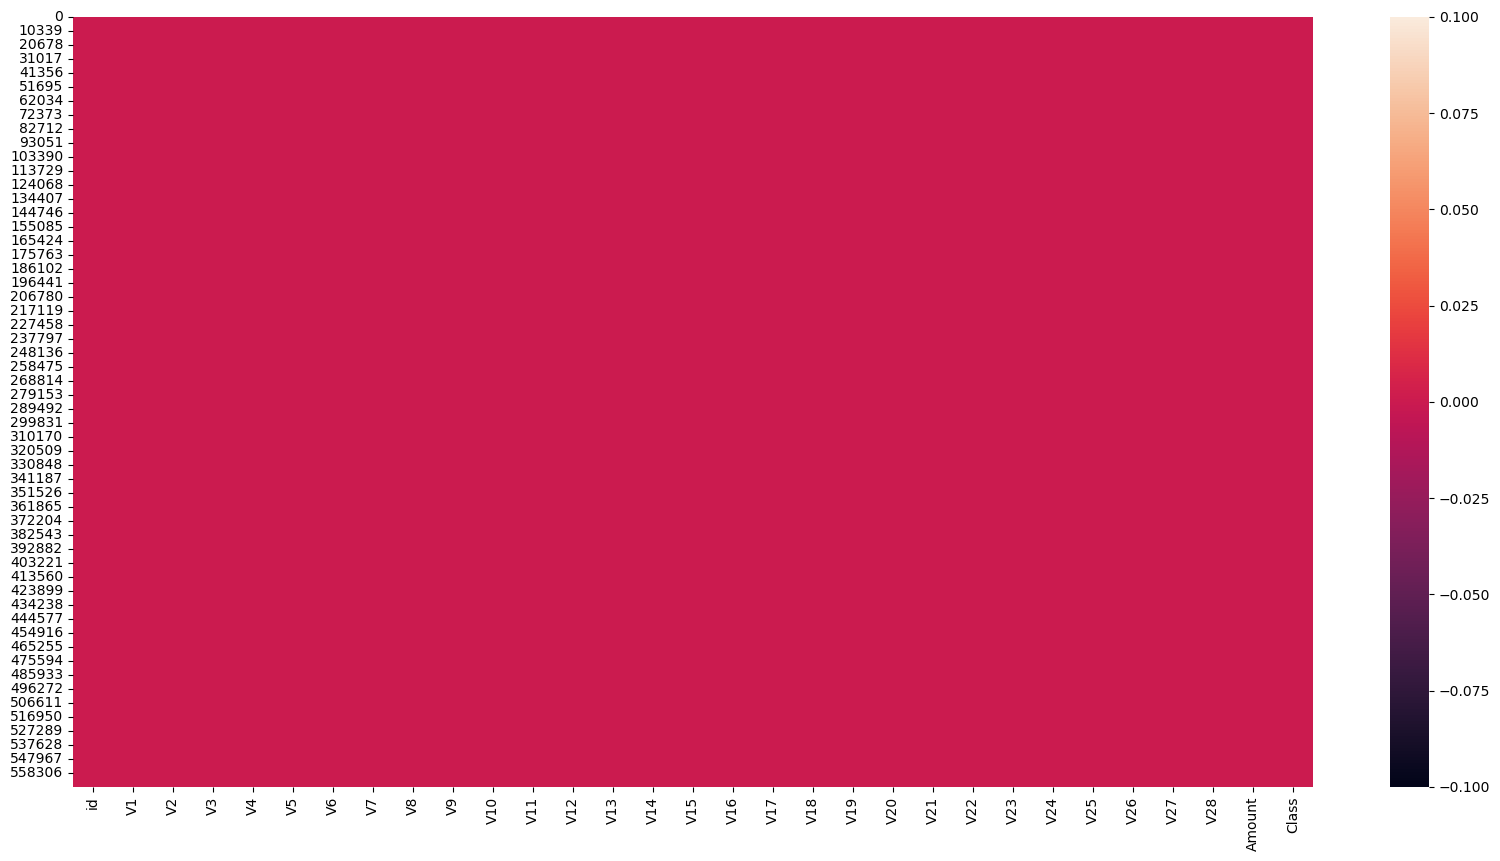

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(dataset.isnull())

In [9]:
dataset.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

<Axes: ylabel='count'>

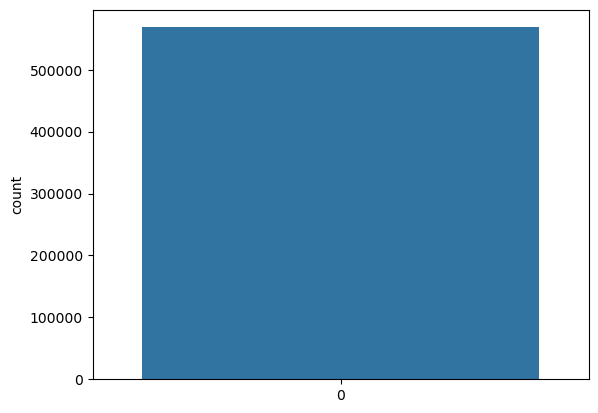

In [10]:
sns.countplot(dataset.Class == 0)

In [11]:
(dataset.Class == 0 ).sum()

284315

In [12]:
(dataset.Class == 1 ).sum()

284315

In [13]:
dataset_2 = dataset.drop(columns = 'Class')

<Axes: title={'center': ' correlation index'}>

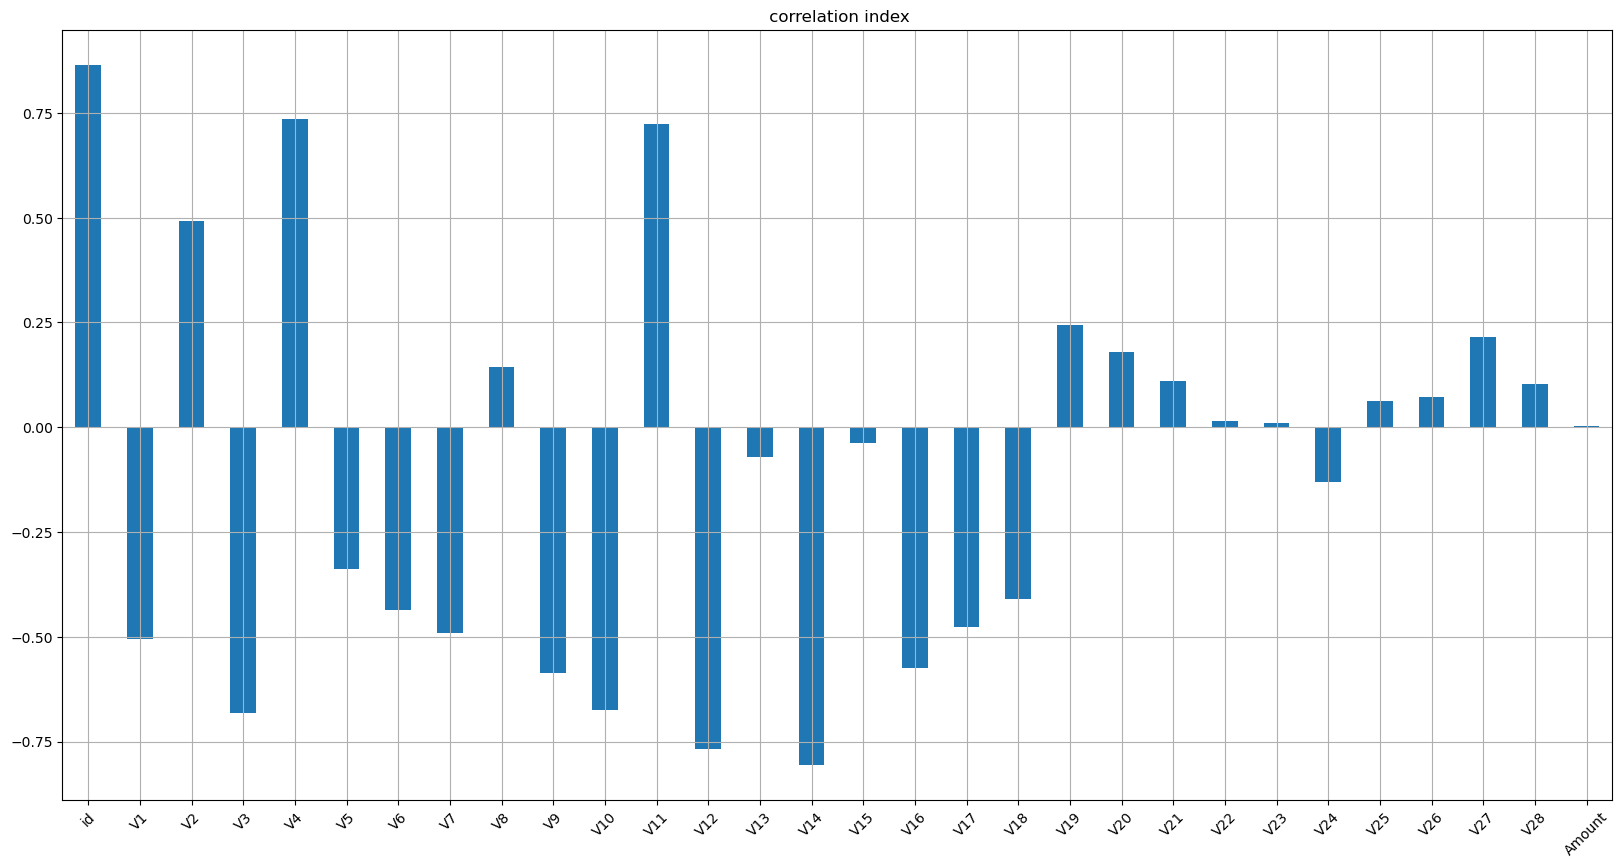

In [14]:
dataset_2.corrwith(dataset['Class']).plot.bar(figsize = (20,10), title = ' correlation index', rot = 45, grid = True)

<Axes: >

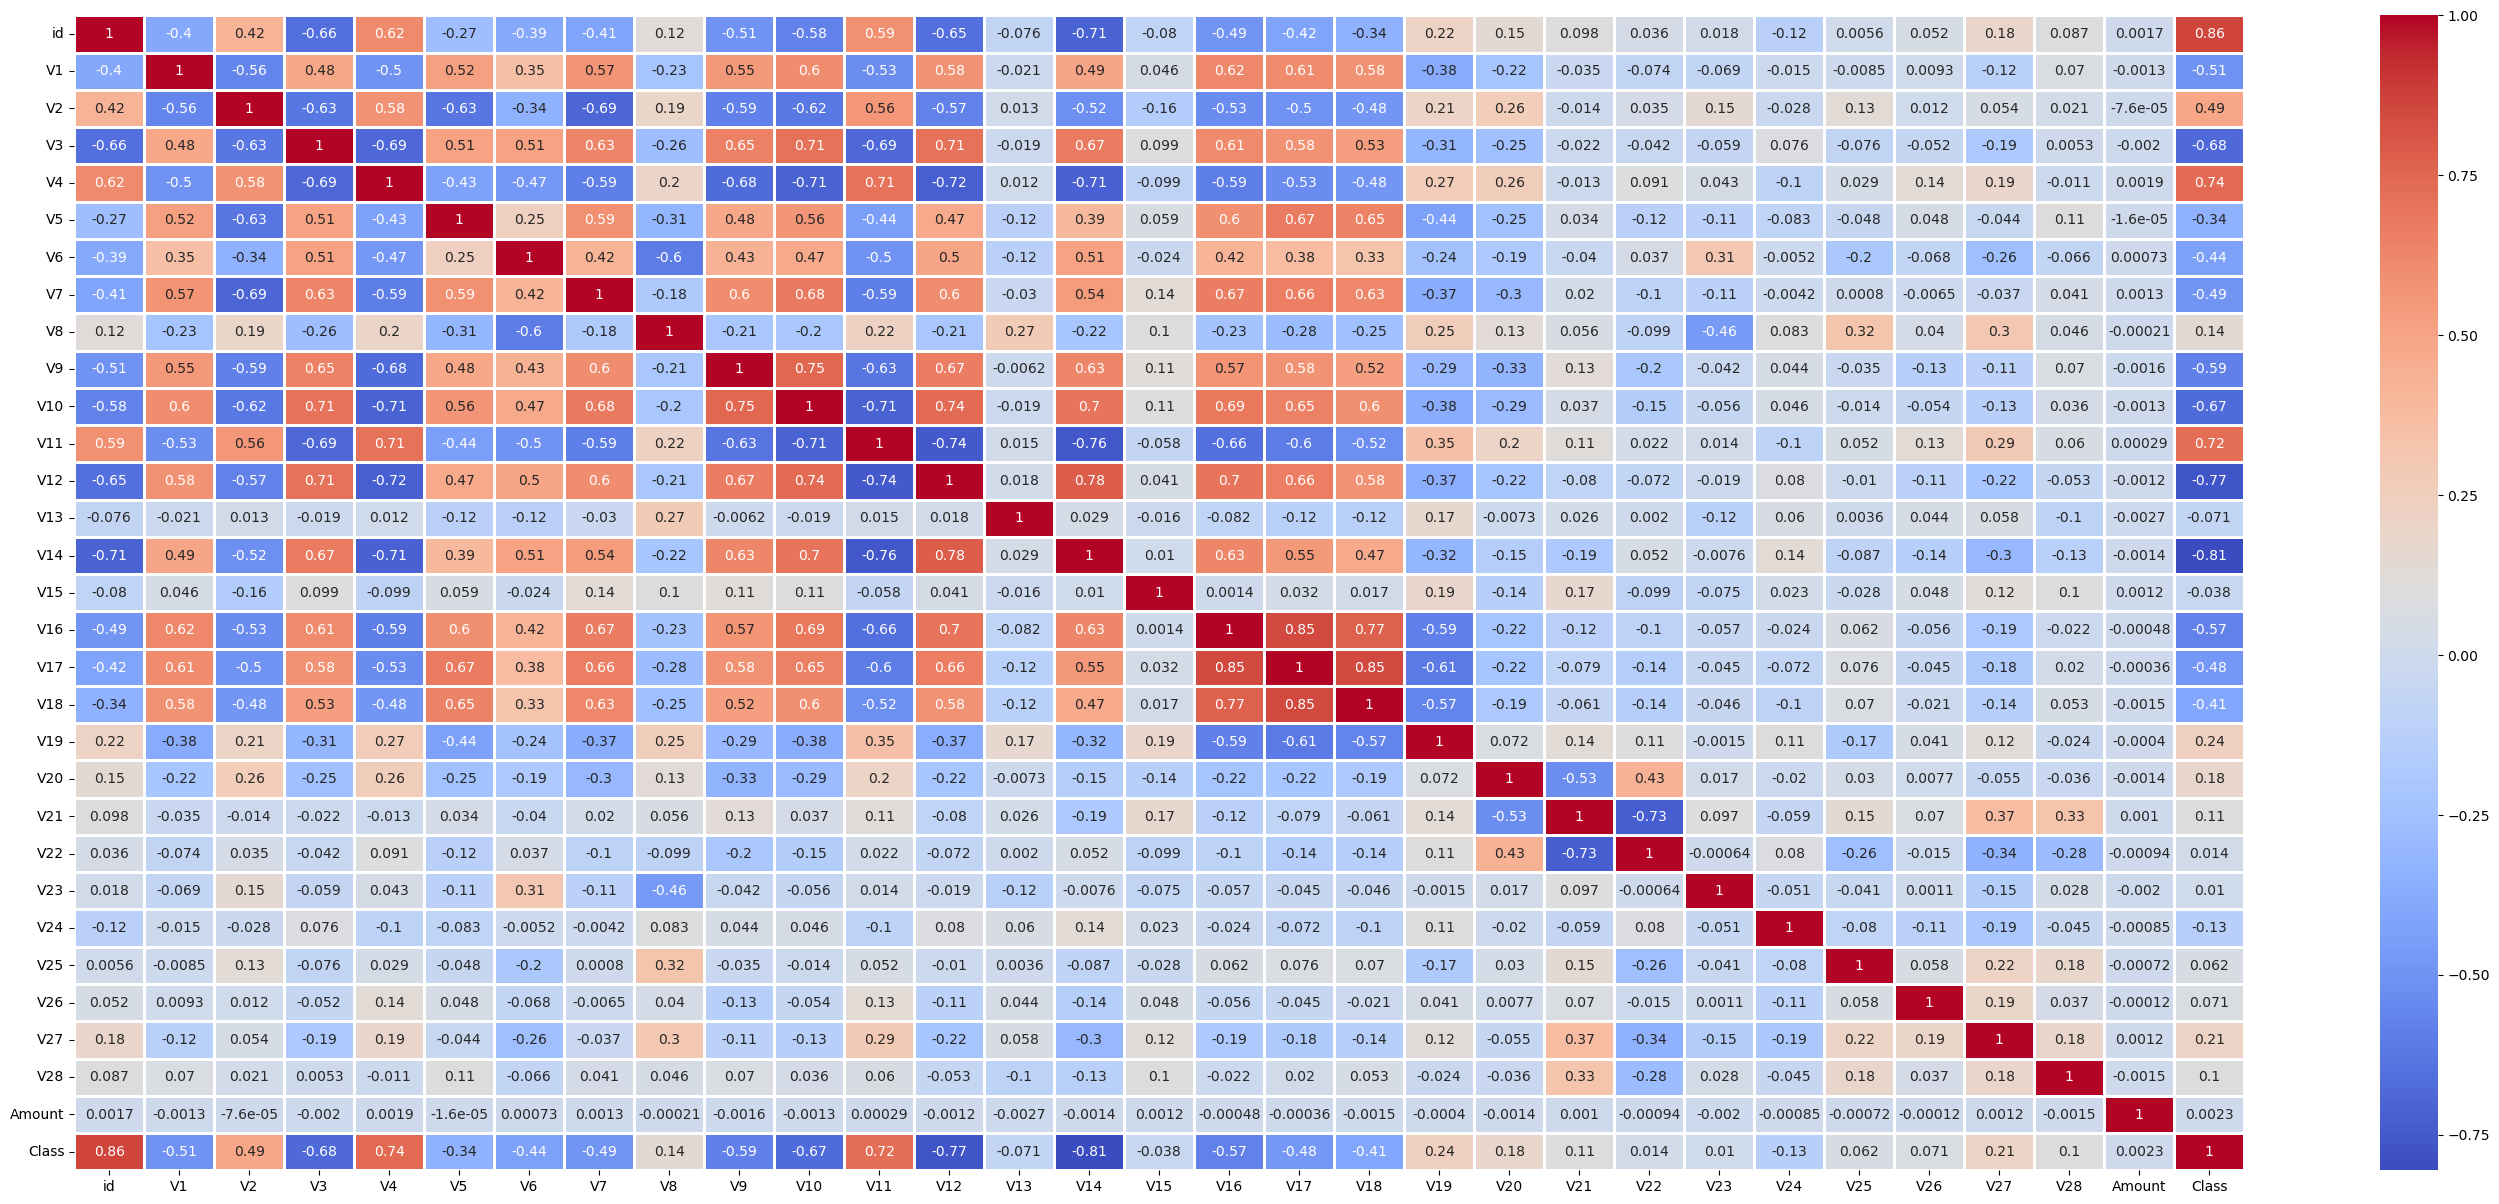

In [15]:
corr =  dataset.corr()
plt.figure(figsize = (35,15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidth = 2)

In [16]:
#findind the features with high correlation 
high_corr = dataset.corr()
high_corr_features = high_corr.index[abs(high_corr['Class'] > 0.5)]

In [17]:
high_corr_features

Index(['id', 'V4', 'V11', 'Class'], dtype='object')

In [18]:
x = dataset.drop(columns = 'Class')

In [19]:
y = dataset['Class']

In [20]:
x

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [21]:
y

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
x_train

array([[-0.02159823,  1.73102366, -1.13484018, ..., -0.2629297 ,
        -0.19303239,  1.71852222],
       [-1.37633949,  1.10407892, -0.28627961, ..., -0.24977822,
        -0.09443492,  0.21256061],
       [-1.60161092, -0.0395976 , -0.66356975, ..., -0.30968618,
        -0.35290221, -0.0550647 ],
       ...,
       [-1.01312875, -0.03502824, -0.20358029, ..., -0.13782793,
         0.18475344,  1.58695759],
       [ 0.92318095, -0.76929056,  0.43535013, ..., -2.62701902,
        -1.56635909,  1.3400638 ],
       [ 0.13058272, -0.87474557, -1.38791345, ...,  1.37875898,
        -2.23564761, -1.22303086]])

In [24]:
y_train

280728    0
58325     0
21343     0
336676    1
157394    0
         ..
359783    1
152315    0
117952    0
435829    1
305711    1
Name: Class, Length: 380982, dtype: int64

In [25]:
x_test

array([[ 1.22061087, -2.23056783,  2.61469193, ...,  1.98932711,
         0.99277547, -0.51058312],
       [ 0.76445176, -2.25197903,  3.12679729, ..., -3.51055705,
        -1.25634288, -0.67433401],
       [ 0.82204576, -0.62473484,  0.53472359, ...,  0.3762213 ,
         0.46791854,  1.26866468],
       ...,
       [ 0.37740546, -0.28605525,  0.26147163, ...,  0.03912014,
        -0.17992316,  0.95694603],
       [ 0.07950041, -1.05392294, -0.67851799, ..., -1.12341407,
        -0.50222745, -0.18832167],
       [-1.23129763,  1.03514811, -0.65899014, ..., -0.16238132,
        -0.08343809,  1.17351643]])

In [26]:
y_test

484657    1
409771    1
419226    1
89221     0
365095    1
         ..
270412    0
87934     0
346231    1
297325    1
82136     0
Name: Class, Length: 187648, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred = logreg.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.998534,0.998536,0.999105,0.997967


In [30]:
#Cross validation
from sklearn.model_selection import cross_val_score
accuracies  = cross_val_score(logreg, X =x_train, y= y_train, cv = 10)

In [31]:
accuracies

array([0.99858264, 0.99837266, 0.99816263, 0.99839887, 0.9985826 ,
       0.99803139, 0.99832012, 0.99850386, 0.99826763, 0.99821513])

In [32]:
print('Accuracy is {:2}%'.format(accuracies.mean()*100))
print('Standard Deviation is {:2}%'.format(accuracies.std()*100))

Accuracy is 99.83437530702382%
Standard Deviation is 0.01723061880970798%


In [33]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
parameters = {'penalty': ['l1','l2','elasticnet'],
             'C': [0.10,0.20,0.25,0.30,0.40,0.50,0.60,0.75,0.90,1,2,5,10,15,100],
             'solver': ['liblinear','sag','saga','newton-cg','lbfgs']}
random_search = RandomizedSearchCV(estimator = logreg, param_distributions = parameters , n_iter = 10,
                                 n_jobs = -1, scoring =  'roc_auc', cv = 10, verbose =3)

In [34]:
random_search.fit(x_train,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.1, 0.2, 0.25, 0.3, 0.4, 0.5,
                                              0.6, 0.75, 0.9, 1, 2, 5, 10, 15,
                                              100],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'sag', 'saga',
                                                   'newton-cg', 'lbfgs']},
                   scoring='roc_auc', verbose=3)

In [35]:
random_search.best_score_
random_search.best_estimator_

LogisticRegression(C=10, solver='saga')

In [36]:
#Final Model
from sklearn.linear_model import LogisticRegression
final_model = LogisticRegression(C=0.5, penalty='l1', solver='saga')
final_model.fit(x_train, y_train)

LogisticRegression(C=0.5, penalty='l1', solver='saga')

In [39]:
y_pred = final_model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
final_results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
final_results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.99782,0.997821,0.99904,0.996605


In [40]:
final = final_results.append(results)
final

AttributeError: 'DataFrame' object has no attribute 'append'

In [41]:
#Cross validation of Final Model
from sklearn.model_selection import cross_val_score
accuracies  = cross_val_score(final_model, X =x_train, y= y_train, cv = 10)
print('Accuracy is {:2}%'.format(accuracies.mean()*100))
print('Standard Deviation is {:2}%'.format(accuracies.std()*100))

Accuracy is 99.76823046080229%
Standard Deviation is 0.016140665472661814%


In [42]:
#Siingle Observation prediction
obs = [[0.0, -1.359807,	-0.072781,	2.536347,	1.378155,	-0.338321,	0.462388,	0.239599,	0.098698,	0.363787,	0.090794,	-0.551600,	-0.617801,	-0.991390,	-0.311169,	1.468177,	-0.470401,	0.207971,	0.025791,	0.403993,	0.251412,	-0.018307,	0.277838,	-0.110474,	0.066928,	0.128539,	-0.189115,	0.133558,	-0.021053,	149.62]]
print(final_model.predict(sc.transform(obs)))           

[0]
